# Medical data visualizer

This is the boilerplate for the Medical Data Visualizer project. Instructions for building your project can be found at https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [3]:
# import dataset
df=pd.read_csv("/content/medical_examination.csv")

In [4]:
df

id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.isnull().sum()

id             0
age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.describe()

id           age           sex        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

# 1 Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [8]:
df['overweight'] = df['weight']/((df['height']/100)**2)
df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1

In [9]:
df

id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  overweight  
0          0     0       1       0         0.0  
1          0     0       1       1         1.0  
2          0     0       0       1         0.0  
3          0     0       1       1         1.0  
4          0     0       0       0         0.0  
...      ...   ...     ...     ...         ...  
69995      1     0       1       0         1.0  
69996      0     0       1       1         1.0  
69997      0     1       0       1         1.0  
69998      0     0       0       1         1.0  
69999      0     0       1       0         0.0  

[70000 rows x 14 columns]

# 2 Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [13]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1


# 3Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

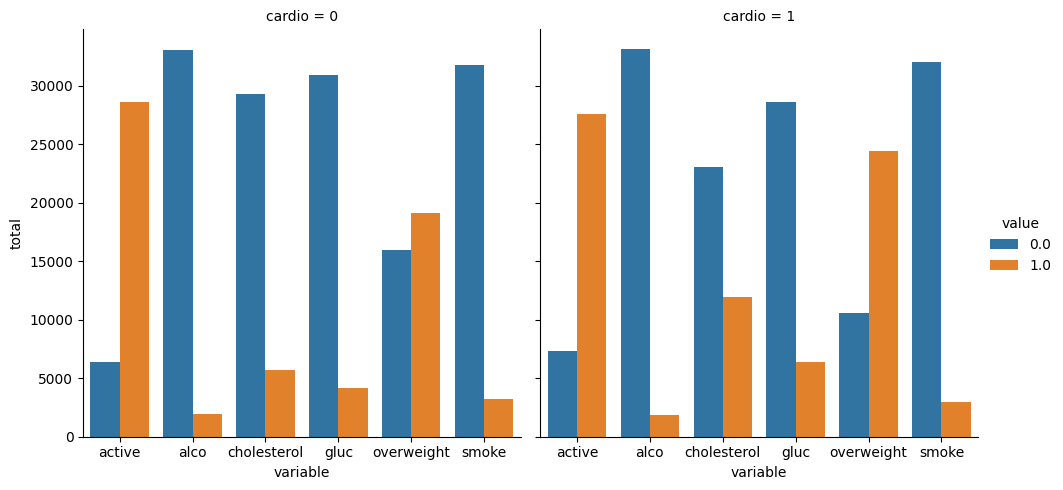

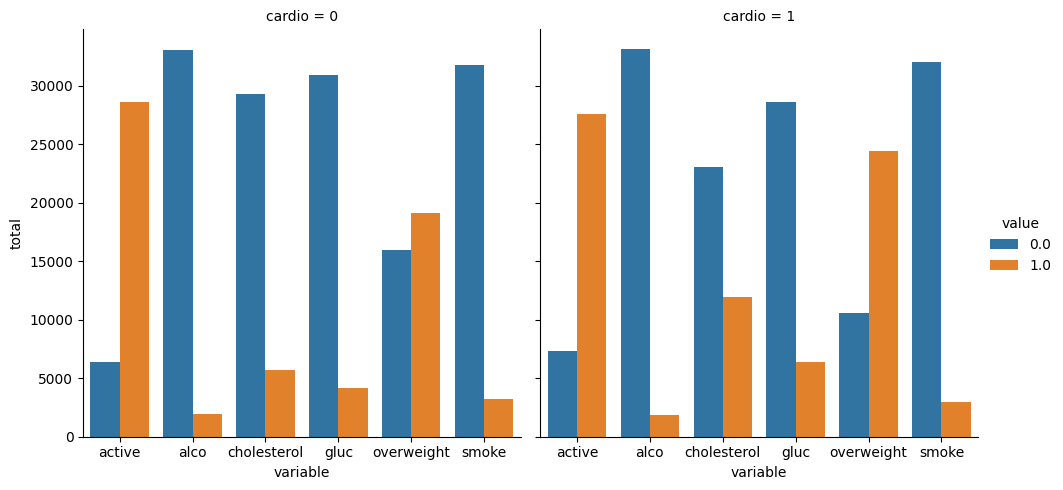

In [17]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'])['value'].count().to_frame()
    df_cat.rename(columns={'value': 'total'}, inplace=True)
    df_cat.reset_index(inplace=True)

    # Draw the catplot with 'sns.catplot()'
    catplot = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_cat)
    fig = catplot.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig



# 4 Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile


Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

<ipython-input-22-2d4df260b74d>:20: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


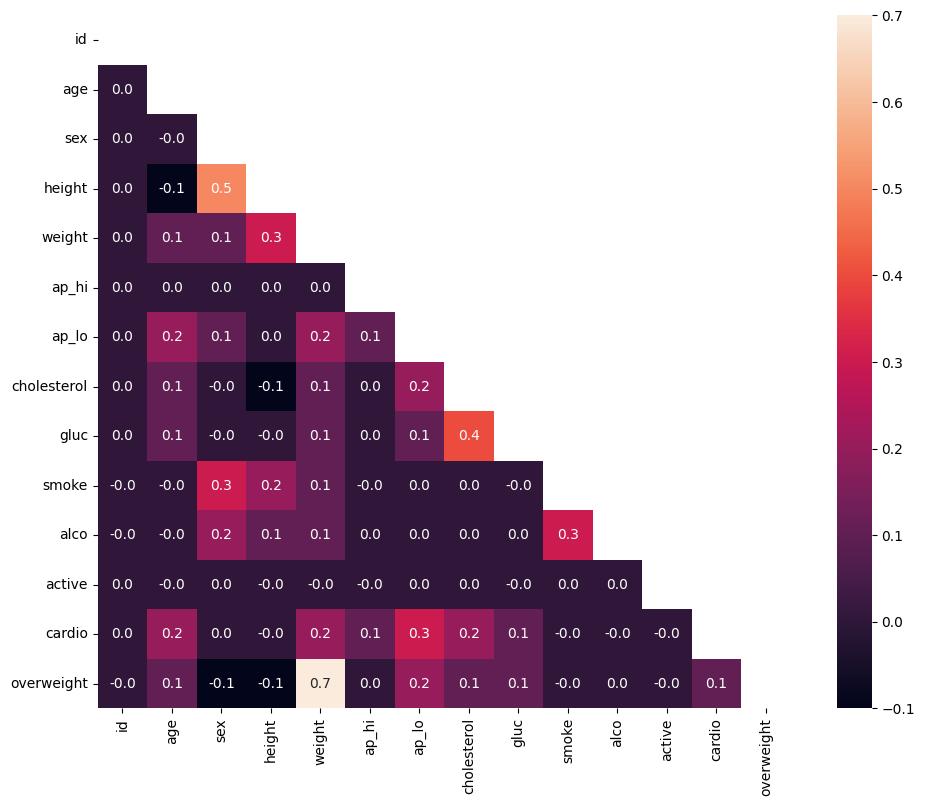

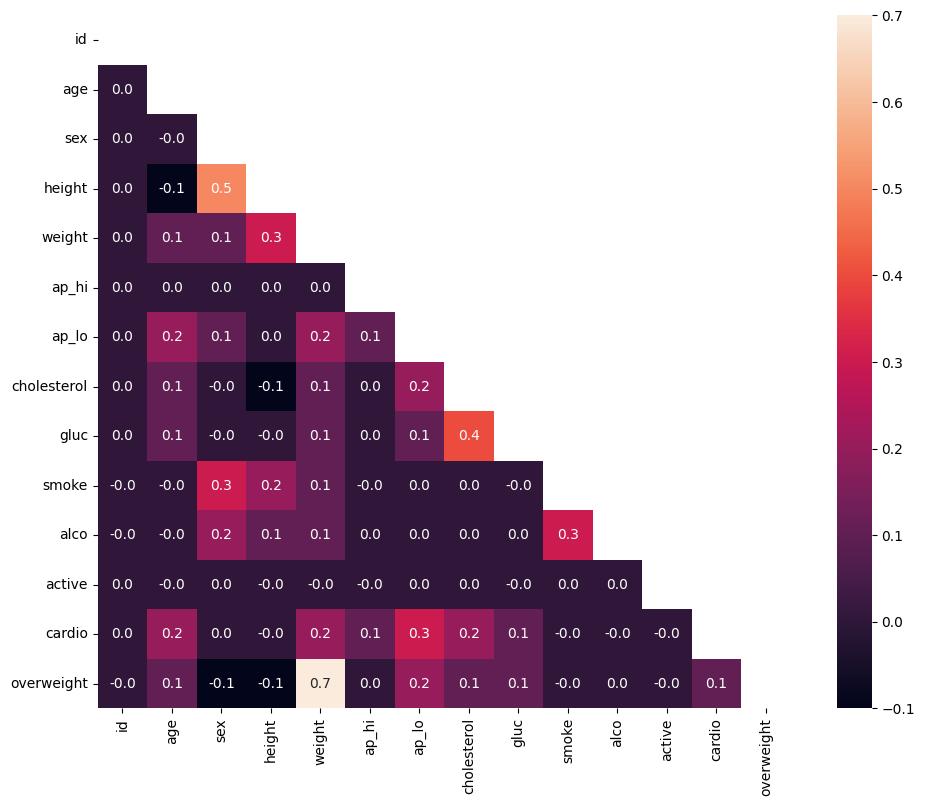

In [22]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    height025 = df['height'].quantile(0.025)
    height975 = df['height'].quantile(0.975)
    weight025 = df['weight'].quantile(0.025)
    weight975 = df['weight'].quantile(0.975)
    df_heat = df[df['ap_lo'] <= df['ap_hi']]
    df_heat = df_heat[df_heat['height'] >= height025]
    df_heat = df_heat[df_heat['height'] <= height975]
    df_heat = df_heat[df_heat['weight'] >= weight025]
    df_heat = df_heat[df_heat['weight'] <= weight975]


    # Calculate the correlation matrix
    corr = df_heat.corr()
    corr = corr.round(1)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 9))

    # Draw the heatmap with 'sns.heatmap()'
    heat_map = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", square=True)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
    heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=90)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()